<a href="https://colab.research.google.com/github/Salma1-dev/gomycode_excersises/blob/main/Copy_of_ToDo_CP_Happy_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [2]:
!gdown --id 1ZNGQnM8l8x0IZGqqjt7hE6dOD4oIAmoI
!gdown --id 1EjaiAT-L0qU_x2XkwyCXGr8N8SLXFDmU

Downloading...
From: https://drive.google.com/uc?id=1ZNGQnM8l8x0IZGqqjt7hE6dOD4oIAmoI
To: /content/test_happy.h5
100% 1.85M/1.85M [00:00<00:00, 29.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EjaiAT-L0qU_x2XkwyCXGr8N8SLXFDmU
To: /content/train_happy.h5
7.38MB [00:00, 45.2MB/s]


In [3]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig
Y_test = Y_test_orig

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (1, 600)
X_test shape: (150, 64, 64, 3)
Y_test shape: (1, 150)


Image shape : (64, 64, 3)


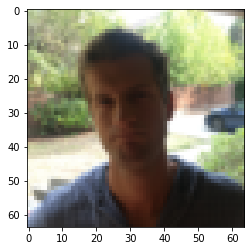

In [5]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [28]:
from tensorflow.keras.layers import Conv2D, Flatten
model = Sequential(
    [Conv2D(
    filters = 10,
    kernel_size = 3,
    strides=(1, 1),
    ),
     Flatten(),
    Dense(16, activation='relu'),    
    Dense(1, activation='sigmoid')])

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [30]:
Y_train = Y_train.reshape(-1, 1)

In [31]:
history_model = model.fit(X_train, Y_train,
                          batch_size= 128,
                    epochs= 30,
                    verbose= 1)

Epoch 1/30
5/5 [==============================] - 2s 121ms/step - loss: 4.2458 - accuracy: 0.4983
Epoch 2/30
5/5 [==============================] - 1s 117ms/step - loss: 1.1558 - accuracy: 0.5367
Epoch 3/30
5/5 [==============================] - 1s 119ms/step - loss: 0.4841 - accuracy: 0.7700
Epoch 4/30
5/5 [==============================] - 1s 119ms/step - loss: 0.3131 - accuracy: 0.8917
Epoch 5/30
5/5 [==============================] - 1s 117ms/step - loss: 0.2435 - accuracy: 0.9183
Epoch 6/30
5/5 [==============================] - 1s 119ms/step - loss: 0.2233 - accuracy: 0.9283
Epoch 7/30
5/5 [==============================] - 1s 118ms/step - loss: 0.1711 - accuracy: 0.9517
Epoch 8/30
5/5 [==============================] - 1s 117ms/step - loss: 0.1650 - accuracy: 0.9517
Epoch 9/30
5/5 [==============================] - 1s 119ms/step - loss: 0.1304 - accuracy: 0.9650
Epoch 10/30
5/5 [==============================] - 1s 116ms/step - loss: 0.1232 - accuracy: 0.9700
Epoch 11/30
5/5 [==

# Evaluate / Test

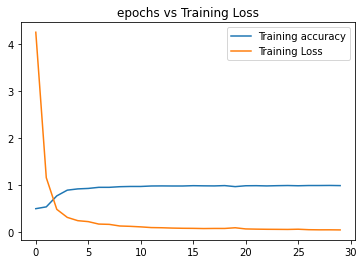

In [32]:
train_accuracy = history_model.history["accuracy"]
train_loss = history_model.history["loss"]

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [41]:
Y_test.shape

(1, 150)

In [42]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test.T)
print(test_loss, test_accuracy)

5/5 [==============================] - 0s 15ms/step - loss: 0.1298 - accuracy: 0.9600
0.12982121109962463 0.9599999785423279


Confusion Matrix

In [49]:
test_logits = model.predict(X_test)

In [50]:
test_logits

array([[0.9998982 ],
       [0.9868026 ],
       [0.99952656],
       [0.9998809 ],
       [0.66202044],
       [0.9760564 ],
       [0.98334455],
       [0.01047668],
       [0.99286187],
       [0.03642535],
       [0.9905094 ],
       [0.09042296],
       [0.97608006],
       [0.6072461 ],
       [0.09546956],
       [0.9841993 ],
       [0.00702235],
       [0.99672186],
       [0.00591689],
       [0.9999138 ],
       [0.91996163],
       [0.98030365],
       [0.55461204],
       [0.9998847 ],
       [0.00491649],
       [0.00352767],
       [0.9560593 ],
       [0.01918969],
       [0.35629532],
       [0.9950402 ],
       [0.9749774 ],
       [0.999143  ],
       [0.98001707],
       [0.9997291 ],
       [0.9912174 ],
       [0.99972355],
       [0.1476424 ],
       [0.04599729],
       [0.04802144],
       [0.00566873],
       [0.7735558 ],
       [0.014541  ],
       [0.08498508],
       [0.00922552],
       [0.9999838 ],
       [0.00552687],
       [0.00407559],
       [0.005

In [51]:
test_predictions = np.argmax(X_test)

In [52]:
test_predictions

84

In [60]:
from sklearn.metrics import confusion_matrix
y_true = Y_test
y_pred = test_logits
print(y_true.shape)
print(y_pred.shape)
confusion_matrix(y_true.T, np.round(y_pred))

(1, 150)
(150, 1)


array([[61,  5],
       [ 1, 83]])

# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)
